In [32]:
import pandas as pd
# Import the data using the file path
filepath = ('Student_performance_data__[1].csv')
data = pd.read_csv(filepath)
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [33]:
data.head(1).T

,0
StudentID,1001.000000
Age,17.000000
Gender,1.000000
Ethnicity,0.000000
ParentalEducation,2.000000
StudyTimeWeekly,19.833723
Absences,7.000000
Tutoring,1.000000
ParentalSupport,2.000000
Extracurricular,0.000000


In [36]:
data.drop(['Ethnicity'], axis=1, inplace=True)
data

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [37]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [38]:
x_cols = [x for x in data.columns if x != 'GradeClass']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['GradeClass']

In [39]:
y_data

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [41]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [42]:
print(accuracy(y_data, y_pred))

0.790133779264214


In [43]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

0.757943143812709


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data.values)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_list

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fit

[(1, 1.0),
 (2, 0.8035117056856187),
 (3, 0.790133779264214),
 (4, 0.7650501672240803),
 (5, 0.7466555183946488),
 (6, 0.7224080267558528),
 (7, 0.7127926421404682),
 (8, 0.6960702341137124),
 (9, 0.6910535117056856),
 (10, 0.6801839464882943),
 (11, 0.6785117056856187),
 (12, 0.6634615384615384),
 (13, 0.6605351170568562),
 (14, 0.653010033444816),
 (15, 0.6429765886287625),
 (16, 0.6387959866220736),
 (17, 0.6341973244147158),
 (18, 0.6241638795986622),
 (19, 0.6166387959866221),
 (20, 0.6091137123745819)]

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

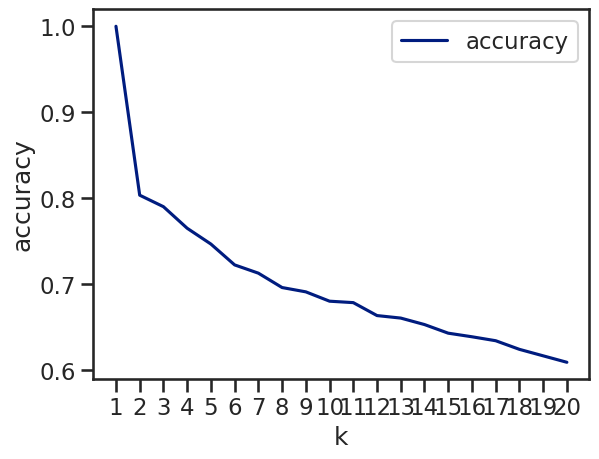

In [46]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

In [47]:
knn = KNeighborsClassifier(n_neighbors=7,p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data.values)

print(accuracy(y_data, y_pred))

0.7282608695652174


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
